In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros. Los datos están disponibles en:

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [11]:
resultados = pd.read_csv("titanic/gender_submission.csv")
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test_data = test_data.merge(
    resultados, 
    how = "left",
    on='PassengerId'
)

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [26]:
(train_data.isnull().sum() / train_data.shape[0] * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [28]:
(test_data.isnull().sum() / test_data.shape[0] * 100).round(2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
Survived        0.00
dtype: float64

2. En base al resultado anterior. ¿Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [32]:
train_data.drop("Cabin", axis = "columns", inplace = True)

In [30]:
test_data.drop("Cabin", axis = "columns", inplace = True)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar cómo se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

<Axes: xlabel='Age', ylabel='Count'>

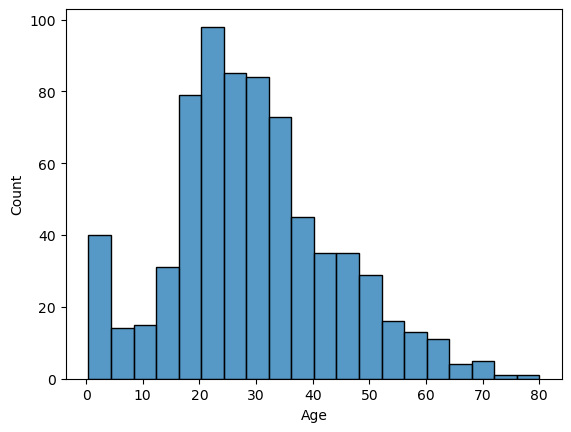

In [34]:
sns.histplot(data = train_data, x = "Age")

In [38]:
train_data.Age.sum() /train_data.shape[0]

23.79929292929293

In [40]:
train_data.Age.median()

28.0

In [42]:
train_data["Age"] = train_data["Age"].fillna(train_data.Age.median())

In [44]:
(train_data.isnull().sum() / train_data.shape[0] * 100).round(2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [46]:
test_data["Age"] = test_data["Age"].fillna(test_data.Age.median())

In [48]:
(test_data.isnull().sum() / test_data.shape[0] * 100).round(2)

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.24
Embarked       0.00
Survived       0.00
dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

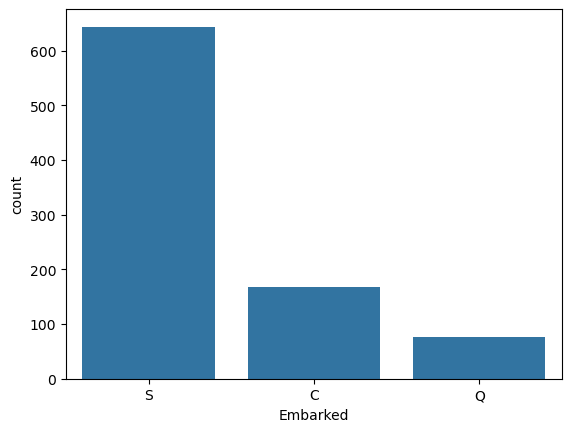

In [50]:
sns.countplot(data = train_data, x = "Embarked")

In [62]:
moda = train_data.Embarked.mode()[0]
train_data.Embarked = train_data.Embarked.fillna(moda)

In [64]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

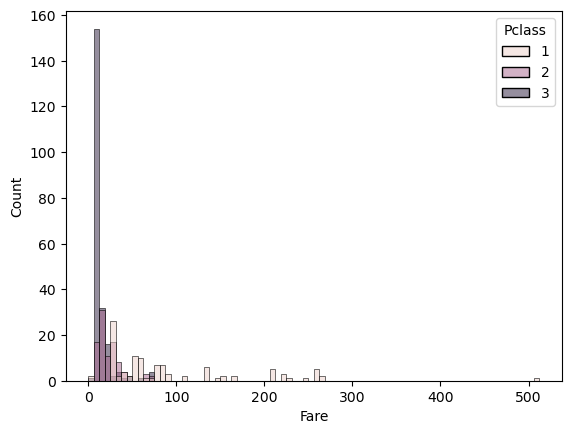

In [72]:
sns.histplot(data = test_data, x = "Fare", hue = "Pclass")

In [80]:
test_data.loc[test_data.Fare.isnull(), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [82]:
mediana = test_data.loc[test_data.Pclass==3, "Fare"].median()
test_data.Fare = test_data.Fare.fillna(mediana)

In [88]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

In [ ]:
sns.countplot(data=train_data, x="")

5. Verificar columnas del DataFrame e identificar sobre cúales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing.

In [90]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [92]:
test_data = pd.get_dummies(
    test_data, 
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first=True
)
train_data = pd.get_dummies(
    train_data, 
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first=True
)

In [94]:
test_data.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Survived', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male'],
      dtype='object')

In [98]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training.

In [102]:
test_data.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

In [104]:
train_data.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

In [106]:
train_data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [110]:
test_data.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training.

In [114]:
train_data["IsMinor"] = np.where(train_data["Age"] <= 16, 1, 0)
test_data["IsMinor"] = np.where(test_data["Age"] <= 16, 1, 0)

8. Ajustar modelo considerando todas las variables del dataset de training.

In [119]:
from sklearn.linear_model import LogisticRegression

In [123]:
X_train = train_data.loc[:, train_data.columns != "Survived"]
y_train = train_data.loc[:, "Survived"]

In [125]:
modelo = LogisticRegression(max_iter = 1000000)

In [127]:
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [129]:
X_test = test_data.loc[:, test_data.columns != "Survived"]
y_test = test_data.loc[:, "Survived"]

In [131]:
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

In [133]:
test_data["prediccion"] = y_pred
test_data["probabilidad_prediccion"] = y_pred_proba

In [135]:
test_data.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor,prediccion,probabilidad_prediccion
0,34.5,0,0,7.8292,0,False,True,True,False,True,0,0,0.116364
1,47.0,1,0,7.0000,1,False,True,False,True,False,0,0,0.383626
2,62.0,0,0,9.6875,0,True,False,True,False,True,0,0,0.183841
3,27.0,0,0,8.6625,0,False,True,False,True,True,0,0,0.096293
4,22.0,1,1,12.2875,1,False,True,False,True,False,0,0,0.491540


10. Calcular matriz de confusión

In [140]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [142]:
tabla = pd.DataFrame(
    {
        "real": y_test, 
        "pred": y_pred
    }
)
tabla.head()

,real,pred
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [146]:
tabla.groupby(["real", "pred"]).size().reset_index()

,real,pred,0
0,0,0,253
1,0,1,13
2,1,0,16
3,1,1,136


In [148]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[253,  13],
       [ 16, 136]])

In [153]:
TN = matriz_confusion[0,0]
FP = matriz_confusion[0,1]
FN = matriz_confusion[1,0]
TP = matriz_confusion[1,1]

11. Calcular Accuracy

In [156]:
(TN + TP) / (TN + TP +FN + FP)

0.930622009569378

12. Calcular sensibilidad

In [160]:
TP / (TP + FN)

0.8947368421052632

13. Calcular especificidad

In [158]:
TN / (TN + FP)

0.9511278195488722

14. Graficar curva de ROC

In [162]:
especificidad_inv, sensibilidad, umbral = roc_curve(y_test, y_pred_proba)

<Axes: >

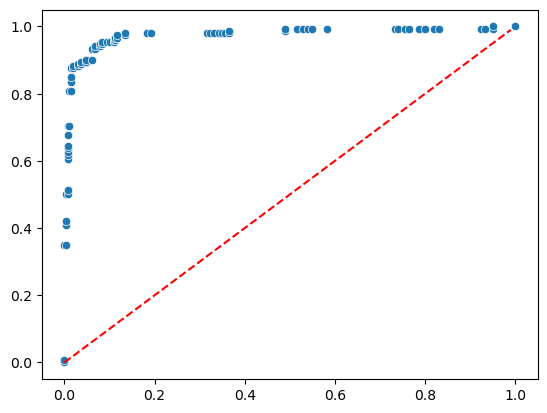

In [168]:
recta_x = [i for i in np.arange(0,1,0.01)]
sns.scatterplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x=recta_x, y = recta_x, color="r", ls = "--")

15. Calcular valor de área bajo la curva de ROC

In [170]:
roc_auc_score(y_test, y_pred_proba)

0.9763553620894343

In [ ]:
range(len(sorted(y_pred_proba)))

In [172]:
sorted(y_pred_proba)

[0.015953286408779365,
 0.021933351689463934,
 0.02376869184590302,
 0.02609465596810516,
 0.02815059627856969,
 0.030876644918506963,
 0.041865690218723654,
 0.04675566713026166,
 0.046879636978939467,
 0.05319479102787005,
 0.056915812524176934,
 0.056933756353364944,
 0.058473594569444676,
 0.05911538630932884,
 0.05967463079608183,
 0.06280490316678784,
 0.06841830315545205,
 0.06955152169956788,
 0.0714060356837378,
 0.07209092762106227,
 0.07209092762106227,
 0.07412701204065235,
 0.07458428083855843,
 0.07515558397930885,
 0.07515996079672986,
 0.07632643386224373,
 0.07926819523350997,
 0.0799229413286032,
 0.08047709365170722,
 0.08115933005759651,
 0.084654179746085,
 0.0847144650776822,
 0.08606504669061515,
 0.08637265274884592,
 0.08643404630831272,
 0.0865203399317993,
 0.08902169786050651,
 0.09117392571572422,
 0.09208364243656751,
 0.09210715697588498,
 0.09382621776116254,
 0.0940967451851943,
 0.09501014242910208,
 0.09572000876300678,
 0.09573720112677274,
 0.095805

<Axes: >

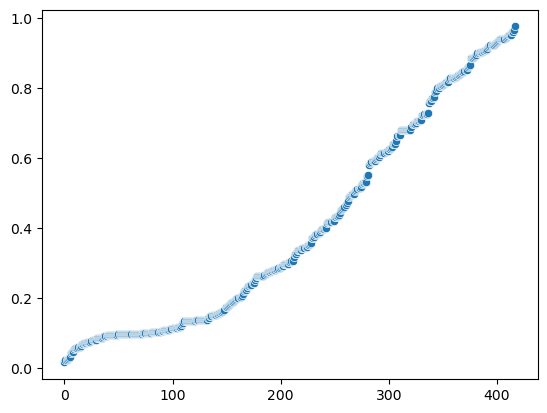

In [174]:
sns.scatterplot(x = range(len(sorted(y_pred_proba))), y = sorted(y_pred_proba))